In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [2]:
df = pd.read_csv("./Datasets//boston_housing.csv")

In [3]:
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [4]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
RM,6.575,6.421,7.185,6.998,7.147,6.43,6.012,6.172,5.631,6.004
LSTAT,4.980,9.140,4.030,2.940,5.330,5.21,12.430,19.150,29.930,17.100
PTRATIO,15.300,17.800,17.800,18.700,18.700,18.70,15.200,15.200,15.200,15.200
MEDV,504000.000,453600.000,728700.000,701400.000,760200.000,602700.00,480900.000,569100.000,346500.000,396900.000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [6]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [7]:
df.shape

(489, 4)

<AxesSubplot:xlabel='LSTAT', ylabel='PTRATIO'>

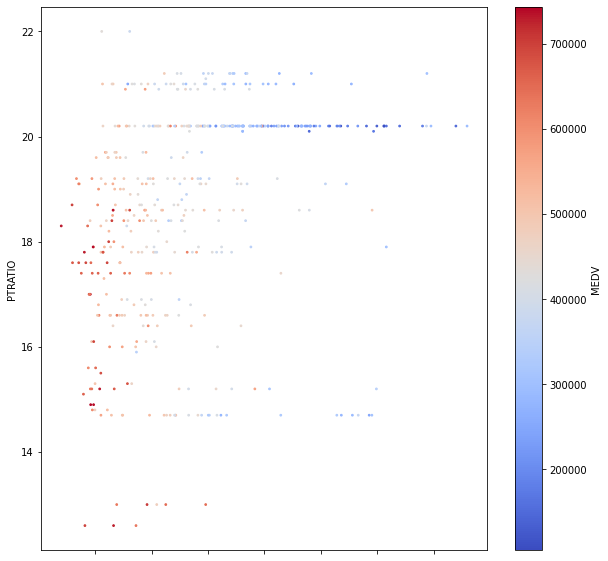

In [8]:
df[df.MEDV<750000].plot(kind="scatter",x = "LSTAT",y="PTRATIO",c="MEDV",cmap="coolwarm",s=3,figsize=(10,10))

In [9]:
scaler = preprocessing.StandardScaler()
df[['RM','LSTAT','PTRATIO','MEDV']] = scaler.fit_transform(df[['RM','LSTAT','PTRATIO','MEDV']])

In [10]:
df1 = df[df.MEDV<750000]
x = df1.drop(['MEDV'],axis=1)
y = df1.MEDV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)

Text(0, 0.5, 'Predicted Prices')

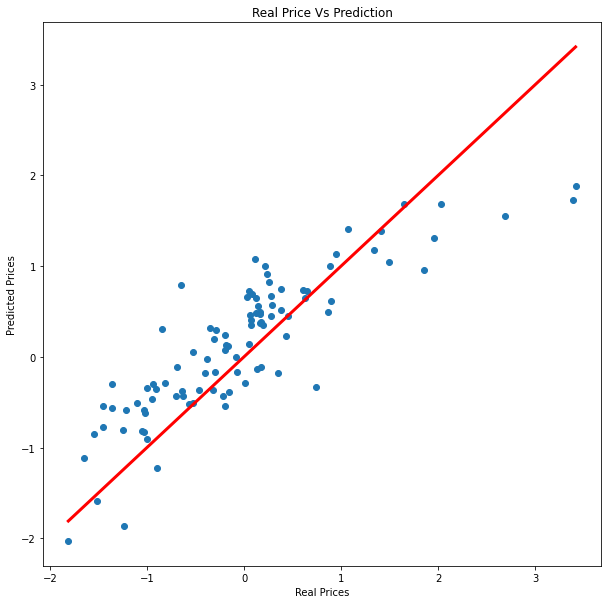

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color="red",linewidth=3)
plt.title("Real Price Vs Prediction")
plt.xlabel("Real Prices")
plt.ylabel("Predicted Prices")

In [13]:
#Linear regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the independent variables and the dependent variable. The goal of linear regression is to find the best-fit line that minimizes the differences between the predicted values and the actual values of the dependent variable.

# The equation of a simple linear regression model with one independent variable can be written as:

# y = β0 + β1 * x

# Where:

# y is the dependent variable (the variable to be predicted)
# x is the independent variable (the variable used to predict y)
# β0 is the y-intercept of the regression line
# β1 is the slope of the regression line
# The coefficients β0 and β1 are estimated using a method called the least squares method, which minimizes the sum of the squared differences between the predicted and actual values.

# In multiple linear regression, there can be more than one independent variable, and the equation becomes:

# y = β0 + β1 * x1 + β2 * x2 + ... + βn * xn

# The coefficients β0, β1, β2, ..., βn are estimated using similar least squares methods.

# Linear regression can be used for various purposes, such as predicting future values, analyzing the impact of independent variables on the dependent variable, and identifying trends or patterns in data.

In [14]:
#logistic regression
# Logistic regression is a statistical technique used to model the relationship between a binary dependent variable and one or more independent variables. It is commonly used for binary classification tasks, where the dependent variable takes on two possible values (e.g., true/false, yes/no, 0/1).

# Unlike linear regression, which assumes a linear relationship between the independent variables and the dependent variable, logistic regression uses a logistic function (also called a sigmoid function) to model the probability of the dependent variable belonging to a particular category.

# The logistic function, represented by the equation:

# p = 1 / (1 + e^(-z))

# Where:

# p is the probability of the dependent variable belonging to a specific category
# z is a linear combination of the independent variables, calculated as:
# z = β0 + β1 * x1 + β2 * x2 + ... + βn * xn

# The coefficients β0, β1, β2, ..., βn are estimated using a method called maximum likelihood estimation (MLE) or optimization algorithms like gradient descent. The goal is to find the coefficients that maximize the likelihood of the observed data.

# Once the coefficients are estimated, they can be used to predict the probability of the dependent variable belonging to a particular category for new observations. The predicted probability can be transformed into class labels by applying a threshold. For example, if the predicted probability is above 0.5, the observation is classified as belonging to one category; otherwise, it is classified as belonging to the other category.